# Data Visualization
- Allows us to quickly interpret the data and adjust different variables to see their effect.
- Observe the patters.

## plotting libraries: matplotlib, pandas visualization, seaborn, ggplot, plotly

### Matplotlib : A 2D plotting library which produces good quality figures.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cars_data = pd.read_csv('Toyota.csv',index_col=0,na_values=['??','????'])

In [5]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


In [6]:
cars_data.dropna(axis=0, inplace=True)

In [7]:
cars_data.shape

(1096, 10)

### 1. Scatter Plot
- A scatter plot is a set of points that represents the values obtained for two different variables plotted on a horizontal and vertical axis.
- Scatter plots are used to convey the relationship b/w two numerical variables.
- Scatter plots are sometimes called correlation plots because they show how two variables are correlated.

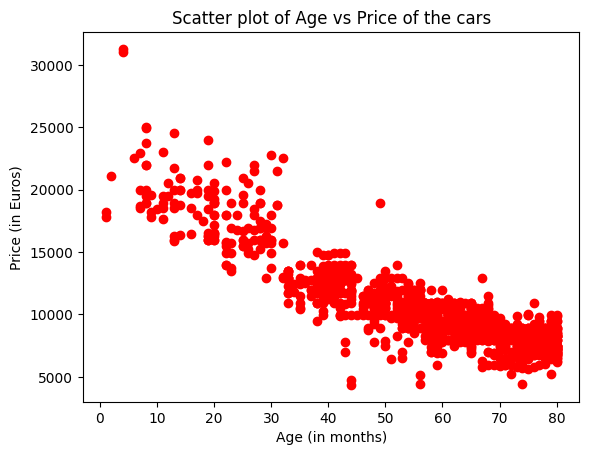

In [10]:
plt.scatter(cars_data['Age'],cars_data['Price'],c='red')
plt.title('Scatter plot of Age vs Price of the cars')
plt.xlabel('Age (in months)')
plt.ylabel('Price (in Euros)')
plt.show()

The above plot shows a negative correlation b/w age and price of the cars.

### 2. Histogram
- Graphical representation of data using bars of different heights.
- Histogram groups numbers into ranges and height of each bar depicts the frequency of each range or bin.
- Used to represent the frequency distribution of numerical variables.

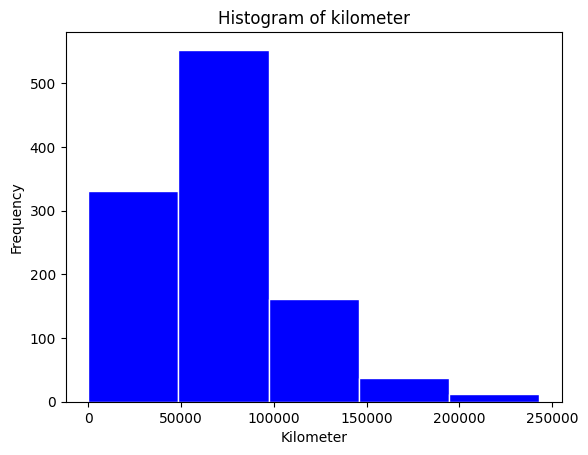

In [12]:
plt.hist(cars_data['KM'],
        color = 'blue',
        edgecolor = 'white',
        bins=5)
plt.title('Histogram of kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

### 3. Bar plot
- A bar plot is a plot that presents categorical data with rectangular bars with lengths proportional to the counts that they represent.
- To represent the frequency distribution of categorical variable.

In [17]:
# frquency distribution of fuel type
cars_data['FuelType'].value_counts()

FuelType
Petrol    968
Diesel    116
CNG        12
Name: count, dtype: int64

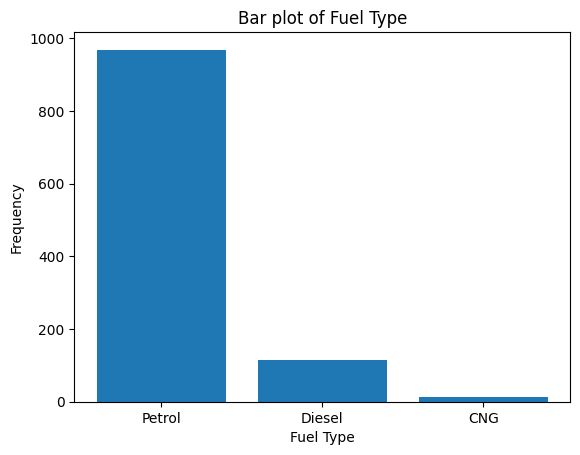

In [20]:
x = ['Petrol','Diesel','CNG'];
y = [968, 116, 12]
plt.bar(x,y)
plt.title('Bar plot of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.show()

## Seaborn 
- Seaborn is a python data visualization library based on matplotlib.
- It provides a high level interface for drawing attractive and informative statistical graphics.

In [21]:
import seaborn as sns

### 1. Scatter Plot

<Axes: xlabel='Age', ylabel='Price'>

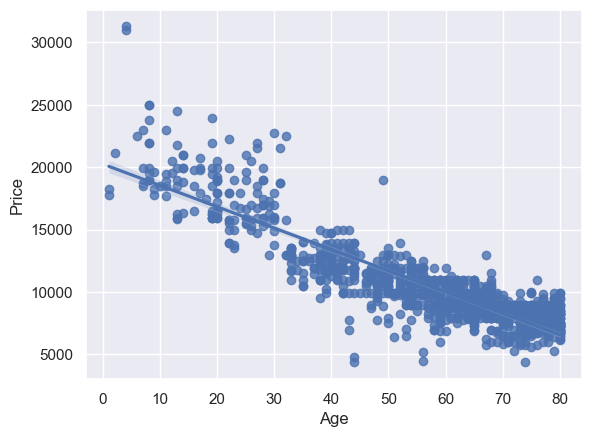

In [27]:
# Scatter plot of price vs Age
sns.set(style='darkgrid')
sns.regplot(x='Age', y='Price', data=cars_data)

<Axes: xlabel='Age', ylabel='Price'>

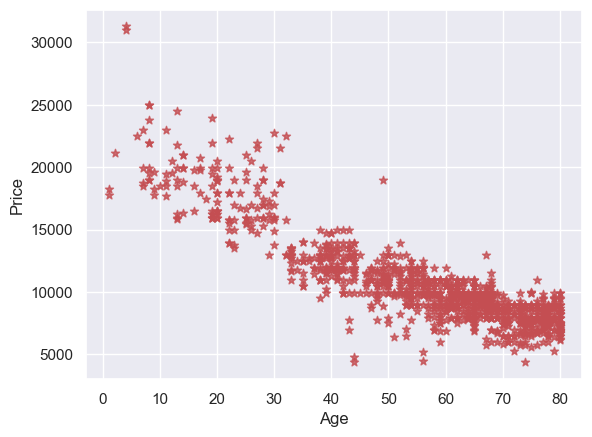

In [33]:
sns.set(style='darkgrid')
sns.regplot(x='Age', y='Price', data=cars_data, fit_reg=False, color='r', marker='*')

In [34]:
# Scatter plot of Price vs Age by FuelType
# Using hue parameter, including another variable to show the fuel types categoris with different colors.

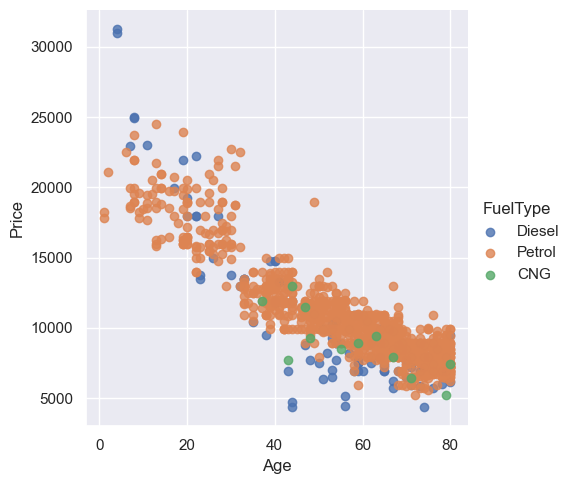

In [36]:
sns.lmplot(x='Age', y='Price', hue='FuelType', legend=True, data=cars_data, fit_reg=False)

Similarly, we can custom the appearance of the markers using:
- Transparency
- shape
- size

## 2. Histogram

<Axes: xlabel='Age', ylabel='Count'>

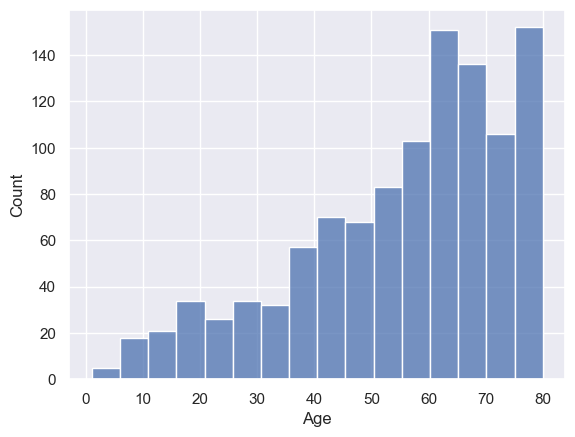

In [38]:
# histogram of age variable
sns.histplot(cars_data['Age'])

<Axes: xlabel='Age', ylabel='Count'>

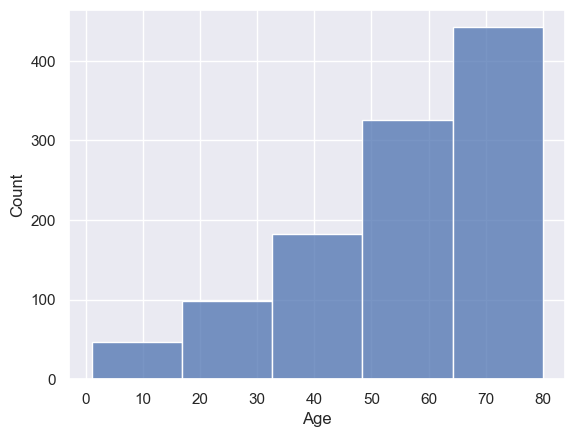

In [39]:
sns.histplot(cars_data['Age'],bins=5)

## 3. Bar plot


<Axes: xlabel='FuelType', ylabel='count'>

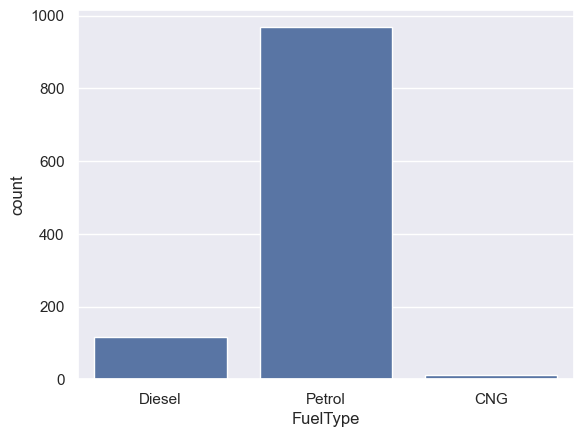

In [40]:
# frequency distribution of fuel type of the cars
sns.countplot(x='FuelType',data=cars_data)

### Grouped bar plot

<Axes: xlabel='FuelType', ylabel='count'>

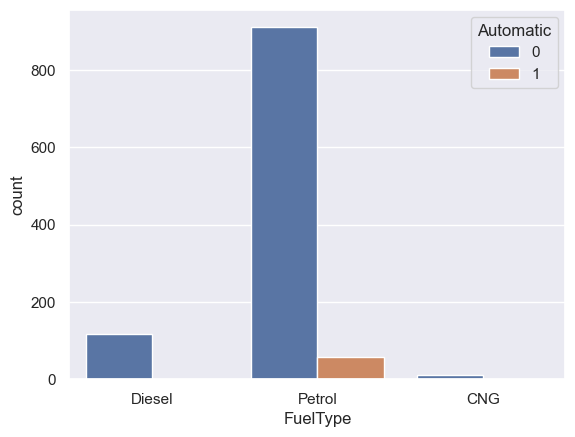

In [41]:
# Grouped bar plot of FuelType and Automatic
sns.countplot(x='FuelType',data=cars_data,hue='Automatic')

In [44]:
pd.crosstab(index=cars_data['Automatic'],
           columns=cars_data['FuelType'],
           dropna=True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,12,116,910
1,0,0,58


## 4. Box and whiskers plot - numerical variable

<Axes: ylabel='Price'>

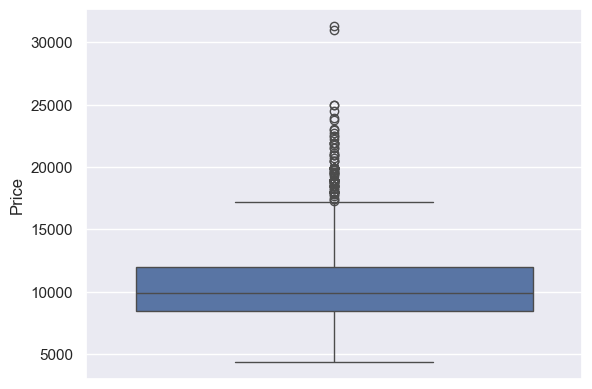

In [45]:
# Box and whiskers plot of Price to visually interpret the 5-number summary.
sns.boxplot(y=cars_data['Price'])

5 number summary include :
- minimum value excluding the outliers
- 1st quartile : 25% of data is less than this value
- 2nd quartile (median) : 50% of data is less than this value
- 3rd quartile : 75% of data is less than this value
- maximum value excluding the outliers
- outliers above the upper whisker : > than 1.5 times q3
- outliers below the lower whisker : < than 1.5 times q1

<Axes: xlabel='FuelType', ylabel='Price'>

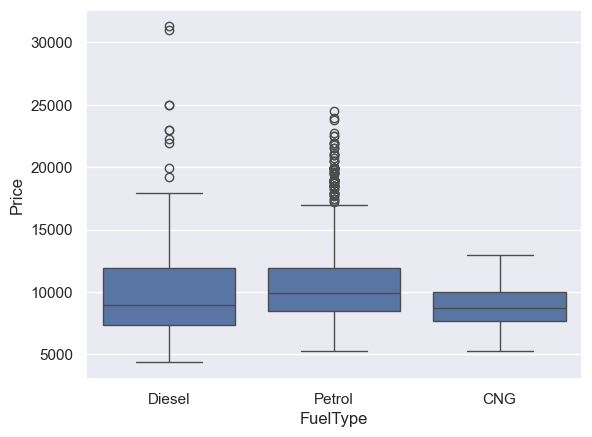

In [46]:
# Box and whiskers plot for numerical vs categorical variable
sns.boxplot(x = cars_data['FuelType'], y=cars_data['Price'])


### Grouped box and whiskers plot


<Axes: xlabel='FuelType', ylabel='Price'>

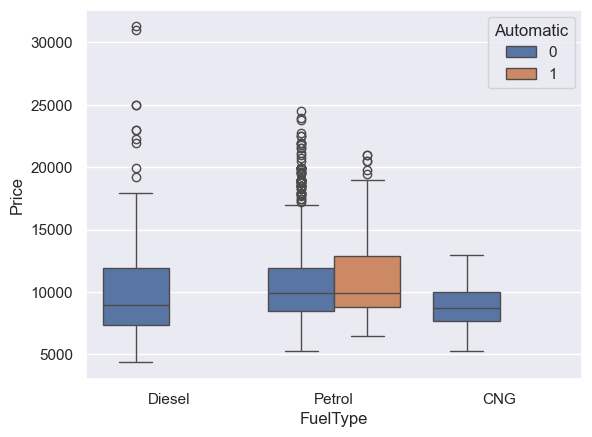

In [48]:
# Grouped box and whiskers plot of Price vs FuelType and Automatic
sns.boxplot(x='FuelType',y='Price',hue='Automatic',data=cars_data)

## Box-whiskers plot and Histogram
- Let's plot box-whiskers plot and histogram on the same window.
- Split the plotting window into 2 parts.)

<Axes: xlabel='Price', ylabel='Count'>

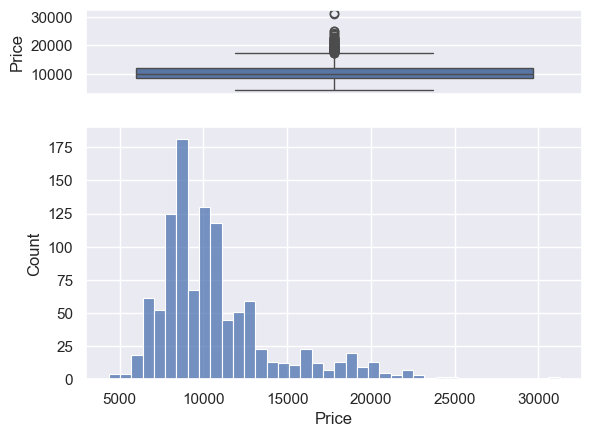

In [53]:
f, (ax_box,ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.25,.75)})
sns.boxplot(cars_data['Price'],ax=ax_box)
sns.histplot(cars_data['Price'],ax=ax_hist)

## Pair-wise plot
- used to plot pairwise relationships ina dataset
- Creates scatterplots for joint relationships and histograms for univariate distributions.

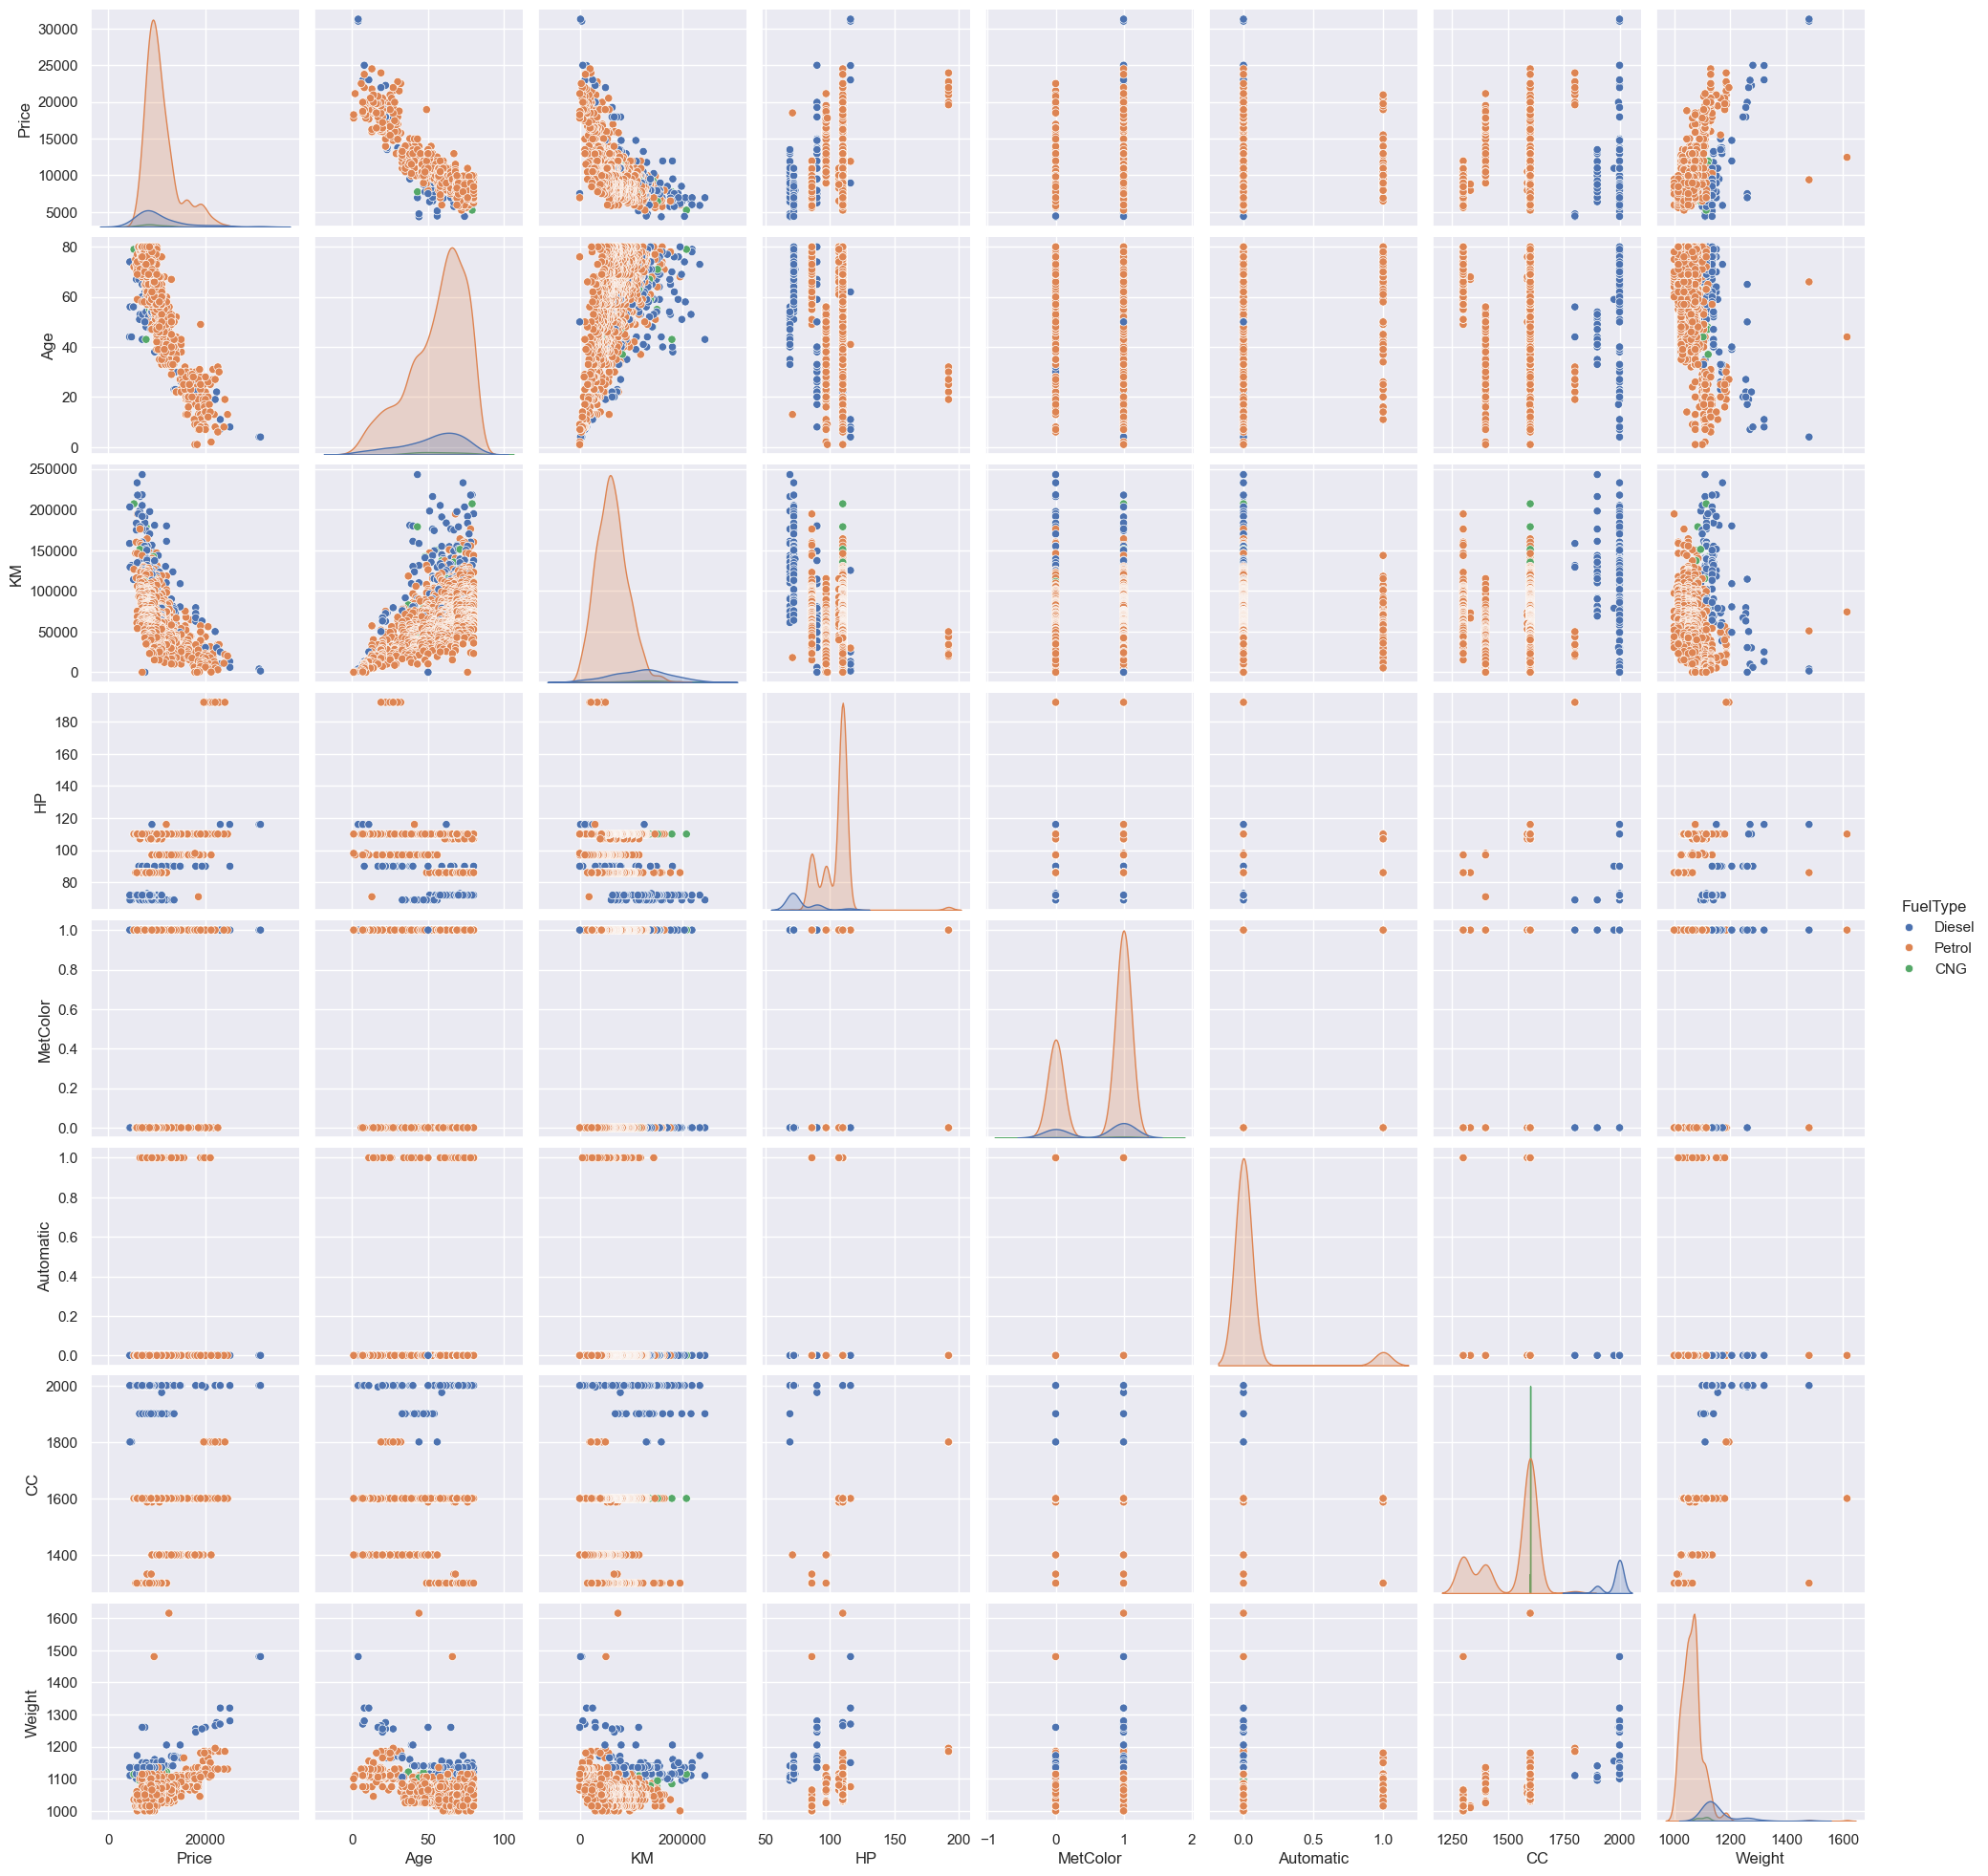

In [56]:
sns.pairplot(cars_data,kind='scatter',hue='FuelType')